# AD 654
# Assignment 2
# Wancheng Zhang
# 2022/10/7

# Part I

In [1]:
import pandas as pd
import numpy as np

In [8]:
rfm = pd.read_csv("lobster_club_rfm.csv")
hh = pd.read_csv("haunted_hayride.csv")

### QuestionA

In [9]:
rfm.head()

,customerID,days_since_purch,days_since_sitevisit,total_visits_yr,total_purch_yr,total_dollars_yr,total_dollars_other
0,1,27,21,35,25,90.73,54.88
1,2,29,12,25,13,112.33,76.44
2,3,18,5,45,42,67.85,49.11
3,4,31,18,33,34,107.51,86.25
4,5,20,20,27,21,109.98,80.86


In [10]:
rfm = rfm.drop("customerID",axis=1)

### QuestionA(a)
customerID lists every record's ID which does not have any relationship between each other. We cannot say there is huge difference between ID 001 and ID 100. This column will afffect our outcome.

### QuestionB

In [11]:
rfm.describe()

,days_since_purch,days_since_sitevisit,total_visits_yr,total_purch_yr,total_dollars_yr,total_dollars_other
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,27.108563,18.940367,32.619266,25.403670,72.192722,42.947691
std,7.482424,11.788896,6.254946,7.169724,21.354962,23.231503
min,8.000000,0.000000,8.000000,1.000000,11.820000,-17.250000
25%,22.000000,10.000000,29.000000,21.000000,57.495000,27.375000
50%,26.000000,18.000000,33.000000,26.000000,71.860000,42.565000
75%,31.000000,26.000000,37.000000,30.000000,86.485000,58.767500
max,60.000000,60.000000,52.000000,48.000000,137.720000,122.390000


### QuestionB(a)
This function show ranges and means of columns. This help me to check is there any strange data, such as a negative value on spending. For this assignment' purpose, this outcome indicates that we need to scale those variables.

### QuestionC (a)

In [12]:
rfm.isnull().sum()

days_since_purch        0
days_since_sitevisit    0
total_visits_yr         0
total_purch_yr          0
total_dollars_yr        0
total_dollars_other     0
dtype: int64

### QuestionC(b)
There isn't any missing value.

### QuestionC (b)

### QuestionD (a)
Yes. This dataframe need to be standardized because 6 columns have huge differnce on ranges. Big numbers will affect outcome.

### QuestionD (b)

In [13]:
from sklearn import preprocessing
zscore = preprocessing.StandardScaler()
rfm_standard = zscore.fit_transform(rfm)
rfm_standard = pd.DataFrame(rfm_standard)
rfm_standard.columns = rfm.columns

### QuestionE

D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


<AxesSubplot:title={'center':'The Elbow Method'}, xlabel='k', ylabel='SSE'>

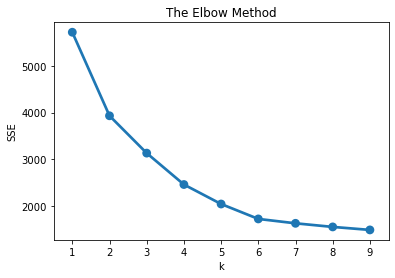

In [18]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
sse = {}
for k in range (1,10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(rfm_standard)
    sse[k] = kmeans.inertia_
plt.title("The Elbow Method")
plt.xlabel("k")
plt.ylabel("SSE")
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))

### QuestionF&G

In [19]:
kmeans = KMeans(n_clusters=6,random_state=42)
kmeans.fit(rfm_standard)
cluster_labels = kmeans.labels_

rfm_standard = rfm_standard.assign(Cluster = cluster_labels)
rfm_standard.groupby(["Cluster"]).agg({
    "days_since_purch":"mean",
    "days_since_sitevisit":"mean",
    "total_visits_yr":"mean",
    "total_purch_yr":"mean",
    "total_dollars_yr":"mean",
    "total_dollars_other":"mean"
})

,days_since_purch,days_since_sitevisit,total_visits_yr,total_purch_yr,total_dollars_yr,total_dollars_other
Cluster,,,,,,
0,0.331382,0.393656,-0.432864,-0.417333,-1.067053,-1.074654
1,-0.257008,-0.263413,0.616349,0.592769,1.100144,1.088507
2,-0.618274,-0.701562,-0.321046,-0.353203,-0.087066,-0.078855
3,-0.413480,-0.443334,1.078325,1.103260,-0.657300,-0.620562
4,-0.165223,-0.022437,-1.532282,-1.481656,0.778788,0.727716
5,1.659700,1.644947,0.030799,0.020836,0.263928,0.269514


I will use 6 clusters for this model. Compare to 5 clusters, outcome of 6 clusters indicates that every column at least has one breakout group. 7 clusters cannot make sure every column at least has 1.5 breakout group, therefore, I think 6 clusters are enough.

### QuestionH&J

In [20]:
rfm_r = rfm.assign(Cluster = cluster_labels)
rfm_r["Cluster"] = rfm_r["Cluster"].astype("category")
rfm_r["Cluster"] = rfm_r["Cluster"].cat.rename_categories({0:"save money",
                                                           1:"work here?",
                                                           2:"long time no see",
                                                           3:"old customer",
                                                           4:"fans",
                                                           5:"jackpot"})
rfm_r.head()

,days_since_purch,days_since_sitevisit,total_visits_yr,total_purch_yr,total_dollars_yr,total_dollars_other,Cluster
0,27,21,35,25,90.73,54.88,work here?
1,29,12,25,13,112.33,76.44,fans
2,18,5,45,42,67.85,49.11,old customer
3,31,18,33,34,107.51,86.25,work here?
4,20,20,27,21,109.98,80.86,fans


### QuestionI&J

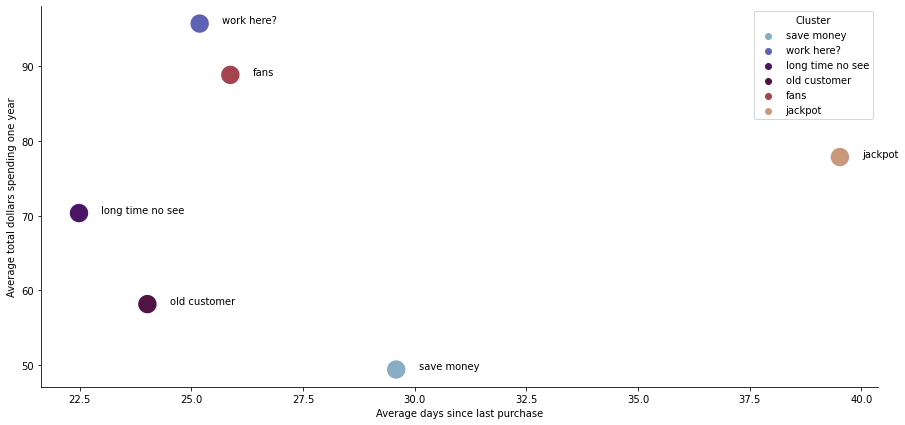

In [21]:
rfm_means = rfm_r.groupby("Cluster")[["days_since_purch","total_dollars_yr"]].mean()
plt.figure(figsize=(15,7))
plt.xlabel("Average days since last purchase")
plt.ylabel("Average total dollars spending one year")
sns.despine()
p1 = sns.scatterplot(x="days_since_purch",y="total_dollars_yr",s=400,hue="Cluster",palette="twilight",data=rfm_means)
for line in range(0,rfm_means.shape[0]):
    p1.text(rfm_means.days_since_purch[line]+.5,rfm_means.total_dollars_yr[line],rfm_means.index[line])

This plot shows we have two types of customer who spend a lot on our website. And long time no see have not purchase for long time, maybe we should send some coupons.

<AxesSubplot:title={'center':'Mean numbers of total visit days'}, xlabel='total_visits_yr', ylabel='Cluster'>

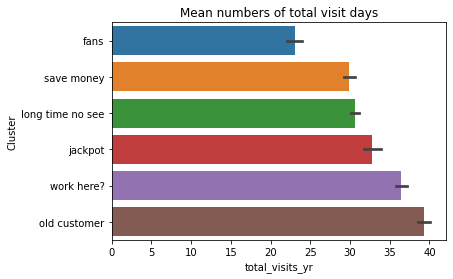

In [22]:
order = rfm_r.groupby(["Cluster"])["total_visits_yr"].mean().sort_values().index
plt.title("Mean numbers of total visit days")
sns.barplot(y="Cluster",x="total_visits_yr",data=rfm_r,order=order)

Even though work here? type cusotmer does not spend a lot on website, they visit a lot. Some coupons may be helpful. Compare to fans, old customer visit more.

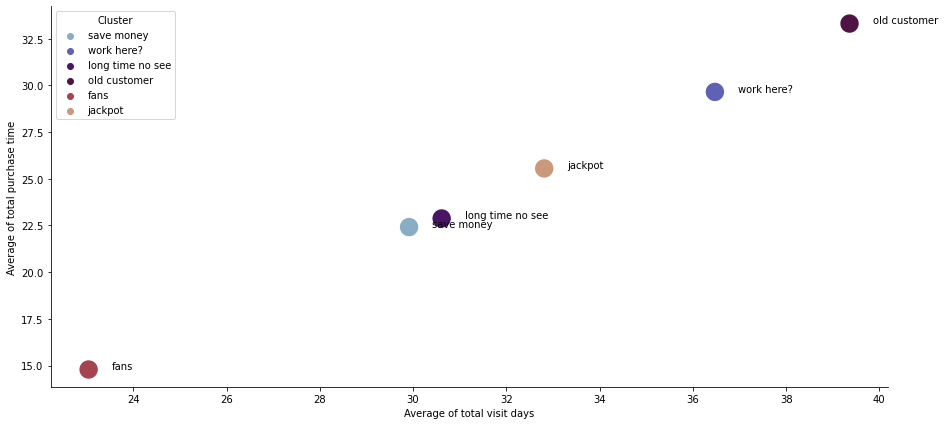

In [23]:
rfm_means = rfm_r.groupby("Cluster")[["total_visits_yr","total_purch_yr"]].mean()
plt.figure(figsize=(15,7))
plt.xlabel("Average of total visit days")
plt.ylabel("Average of total purchase time")
sns.despine()
p1 = sns.scatterplot(x="total_visits_yr",y="total_purch_yr",s=400,hue="Cluster",palette="twilight",data=rfm_means)
for line in range(0,rfm_means.shape[0]):
    p1.text(rfm_means.total_visits_yr[line]+.5,rfm_means.total_purch_yr[line],rfm_means.index[line])

This plot indicates that maybe purchase time is positive relative to visit time. (Need model to varify) Work here? type does not come a lot. Maybe they are new customer to this website and we need to come up another name for them.

1. Jackpot:spend big money on the least and purchase time.
2. Save money: spend the least money on website.
3. Work here?: the minimum number of days since last purchase but do not spend much money.
4. long time no see: the maximum number of days since last purchase.
5. fans: visit a lot and spend a lot.
6. old customer: maximum visit and purchase times.

For long time no see type we need to send them email to attract thier attention. Save money may need discount coupon. We can recommend the most popular product to Jackpot. For work here, i may need more data and model to varify are they new customer. We can send extra gift to fans and old customer when they make next purchase.

# Part II

### QuestionA

In [24]:
hh = pd.read_csv("haunted_hayride.csv")

In [25]:
hh.head()

,bundleID,paxpercar,total_dark_time,flashing_lights,theme,total_time,ghost_touch,no_phone_zone,avg_rating
0,0,4,0,Yes,Pumpkin_Terror,120,Yes,Yes,5.455046
1,1,4,0,Yes,Pumpkin_Terror,120,Yes,No,4.354482
2,2,4,0,Yes,Pumpkin_Terror,120,No,Yes,5.186594
3,3,4,0,Yes,Pumpkin_Terror,120,No,No,9.282721
4,4,4,0,Yes,Pumpkin_Terror,240,Yes,Yes,5.205072


### QuestionB

1. bundleID is numeric but it is ID which does not have meaning.
2. paxpercar is numeric. # of people on the ride at once
3. total_dark_time is numeric. # of dark time
4. falshing_lights is categorical but can be represent by 0 and 1.
5. theme is categorical and can be represent by numbers but no meaning.
6. total_time is numeric. # of total time
7. ghost_tough is categorical but can be represent by 0 and 1.
8. no_phone_zone is categorical but can be represent by 0 and 1.
9. avg_rating is numeric.

### QuestionC

In [26]:
hh.isnull().values.any()

False

In [27]:
hh2 = pd.get_dummies(hh,drop_first=True,columns=[ 'paxpercar', 'total_dark_time', 'flashing_lights', 'theme',
       'total_time', 'ghost_touch', 'no_phone_zone'])

because thsoe numeric values are not represent numbers. Those are choices given by us so those also can be seen as categorical values.

### QuestionD

In [28]:
X = hh2[['paxpercar_8', 'paxpercar_12',
       'total_dark_time_7', 'total_dark_time_12', 'flashing_lights_Yes',
       'theme_Pumpkin_Terror', 'theme_Vampire', 'theme_Zombie Apocalypse',
       'total_time_240', 'total_time_420', 'ghost_touch_Yes',
       'no_phone_zone_Yes']]
Y = hh2["avg_rating"]

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression()

In [30]:
regressor.intercept_

5.8964817508484035

### QuestionE

In [31]:
coef_df = pd.DataFrame(regressor.coef_,X.columns,columns=["Coefficient"])
coef_df

,Coefficient
paxpercar_8,-0.670634
paxpercar_12,-0.254146
total_dark_time_7,-0.135522
total_dark_time_12,-0.704311
flashing_lights_Yes,0.765746
theme_Pumpkin_Terror,0.281009
theme_Vampire,1.065442
theme_Zombie Apocalypse,0.370184
total_time_240,0.723643
total_time_420,0.116849


### QuestionF

Based on the outcomes, flashing lights,Vampire theme, and 240 seconds for total time are 3 most popular features. I am confused about number of people in a ride, total dark time, ghost touch, and no phone zone. Even though, drap_first save us from the multicollinearity problem, we cannot see popularity of those. 

# Part III

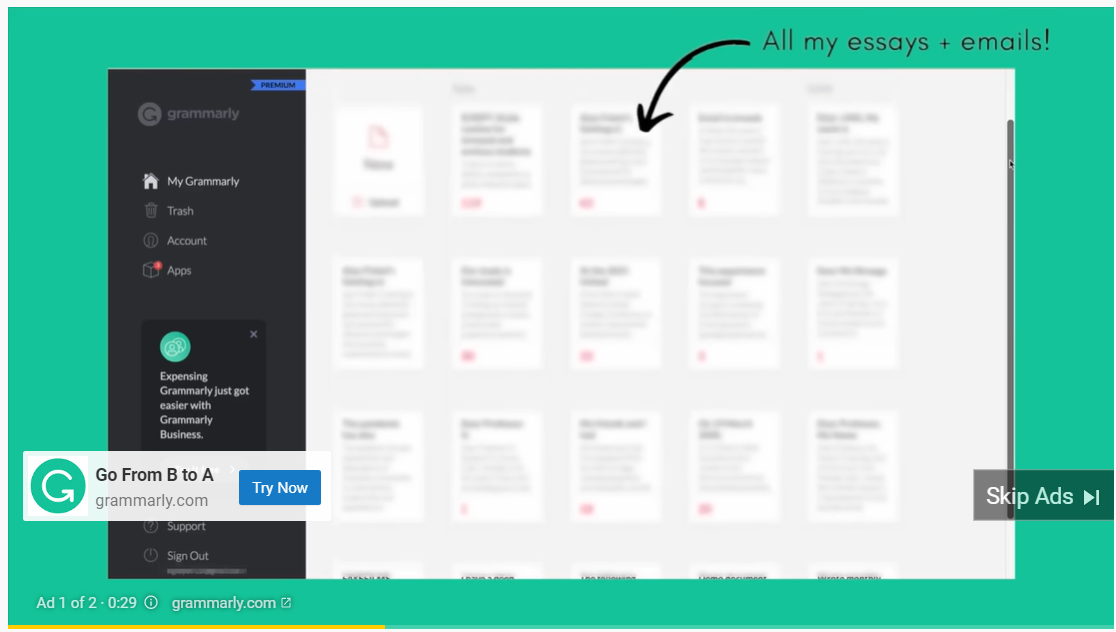

This ad targets people who are writing in English and need correct grammar, especially students whose first language is not English. Grammarly's feature is clear. Based on its features, there should be 3 types of consumers. First, Not necessary type: people who do not need to frequently write essays or paragraphs or people who are good at grammar. This type of consumer may only use it for email.  Second, For purpose type: people like me who need grammar to make sure their words and grammar are proper or at least correct. Third, Formal type: because people need to pay to unlock premium which brings expert help, those who need perfect grammar and word choice are the company's main target. Last, Other function type: there are other functions in Grammarly, such as checking plagiarism, measuring readability and vocabulary, and adjusting audience and formality for varying outcomes. I would say this ad is effective because it clearly explains the most important feature -- correct grammar. And a short scenario is helping the audience to know what the problem is and what Grammarly can do.